### R was chosen for the last part since it offered a wider array of Bing Liu Sentiment Analysis Libraries

In [1]:
#remove.packages("tidyverse")
#install.packages('tidyverse')
#install.packages("tidytext", dependencies = T)
#install.packages('dplyr', dependencies = T)
#install.packages('broom')
#install.packages('stringr')
#remove.packages("tidytext")
#remove.packages("tokenizers", lib = 'X:/Programme/Python/Anaconda/Lib/R/library')
#install.packages('janeaustenr')
#installed.packages()
#install.packages("rlang")
#install.packages("scales")
#library(utils)
#update.packages(ask = F)
#install.packages("vctrs")
#myPaths <- .libPaths()   # get the paths
#myPaths <- c(myPaths[2], myPaths[1])
#.libPaths(myPaths)
#install.packages('tidyverse')
R.version
#.libPaths()

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [2]:
library('tidyverse')    # data manipulation & plotting
library(tidytext)      # text cleaning and regular expressions
library(stringr)       # provides additional text mining functions

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
head(get_sentiments("bing"),20)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [4]:
get_sentiments("bing") %>% 
  count(sentiment) # more negative words than positive in the lexicon

sentiment,n
<chr>,<int>
negative,4781
positive,2005


In [5]:
# load preprocessed comments data
df <- read.csv(file = 'processed_comments.csv') # read data
head(df)

,X,Comment,Sentiment..Afinn.s.Dictionary.
,<int>,<chr>,<dbl>
1,0,comment investing broker scam video cryptocurrencie evidently include underlie technology math hotbed attract nefarious actor prey hi new channel visualize math I probably land search btc work spend afternoon getting pull learn prime number problem solve moment look rest channel enjoy find,0
2,1,I recommend report reply explain potential reader advertisement scam comment quick save somebody dollar,2
3,2,thank lisa,2
4,3,matter time scammer come discount,1
5,4,wow I scam scroll reply lmao,6
6,5,I appreciate effort account I try I regret,0


In [6]:
# create comments vector
comments = df$Comment
comments

[1] "comment investing broker scam video cryptocurrencie evidently include underlie technology math hotbed attract nefarious actor prey hi new channel visualize math I probably land search btc work spend afternoon getting pull learn prime number problem solve moment look rest channel enjoy find"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  [2] "I recommend report reply explain potential reader advertisement scam comment quick save somebody dollar"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
  [3] "thank lisa"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [4] "matter time scammer come discount"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [7]:
comments = df$Comment
text_df = tibble(comment = 1:length(df$Comment), text = as.character(comments))
text_df

comment,text
<int>,<chr>
1,comment investing broker scam video cryptocurrencie evidently include underlie technology math hotbed attract nefarious actor prey hi new channel visualize math I probably land search btc work spend afternoon getting pull learn prime number problem solve moment look rest channel enjoy find
2,I recommend report reply explain potential reader advertisement scam comment quick save somebody dollar
3,thank lisa
4,matter time scammer come discount
5,wow I scam scroll reply lmao
6,I appreciate effort account I try I regret
7,yeah right
8,mr crystal eat hamster
9,gile lmaooooo


In [8]:
library(tidytext)
tokens = text_df %>% unnest_tokens(word, text)
tokens

comment,word
<int>,<chr>
1,comment
1,investing
1,broker
1,scam
1,video
1,cryptocurrencie
1,evidently
1,include
1,underlie


In [9]:
head(tokens %>%
  count(word, sort = T), 25)

word,n
<chr>,<int>
i,159
video,62
block,44
thank,32
bitcoin,30
transaction,26
work,26
hash,25
miner,22


In [10]:
bing <- tokens %>% 
    inner_join(get_sentiments("bing")) %>%
    mutate(method = "Bing et al.")
head(bing, 25)

Joining, by = "word"


comment,word,sentiment,method
<int>,<chr>,<chr>,<chr>
1,scam,negative,Bing et al.
1,nefarious,negative,Bing et al.
1,work,positive,Bing et al.
1,problem,negative,Bing et al.
1,enjoy,positive,Bing et al.
2,recommend,positive,Bing et al.
2,scam,negative,Bing et al.
3,thank,positive,Bing et al.
5,wow,positive,Bing et al.


In [11]:
bing_word_counts <- tokens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


In [12]:
head(bing_word_counts, 10)

word,sentiment,n
<chr>,<chr>,<int>
thank,positive,32
work,positive,26
good,positive,20
like,positive,16
problem,negative,12
great,positive,10
love,positive,9
attack,negative,5
confused,negative,5


In [13]:
library(repr)
options(repr.plot.width = 15, repr.plot.height=6) #resize plot area

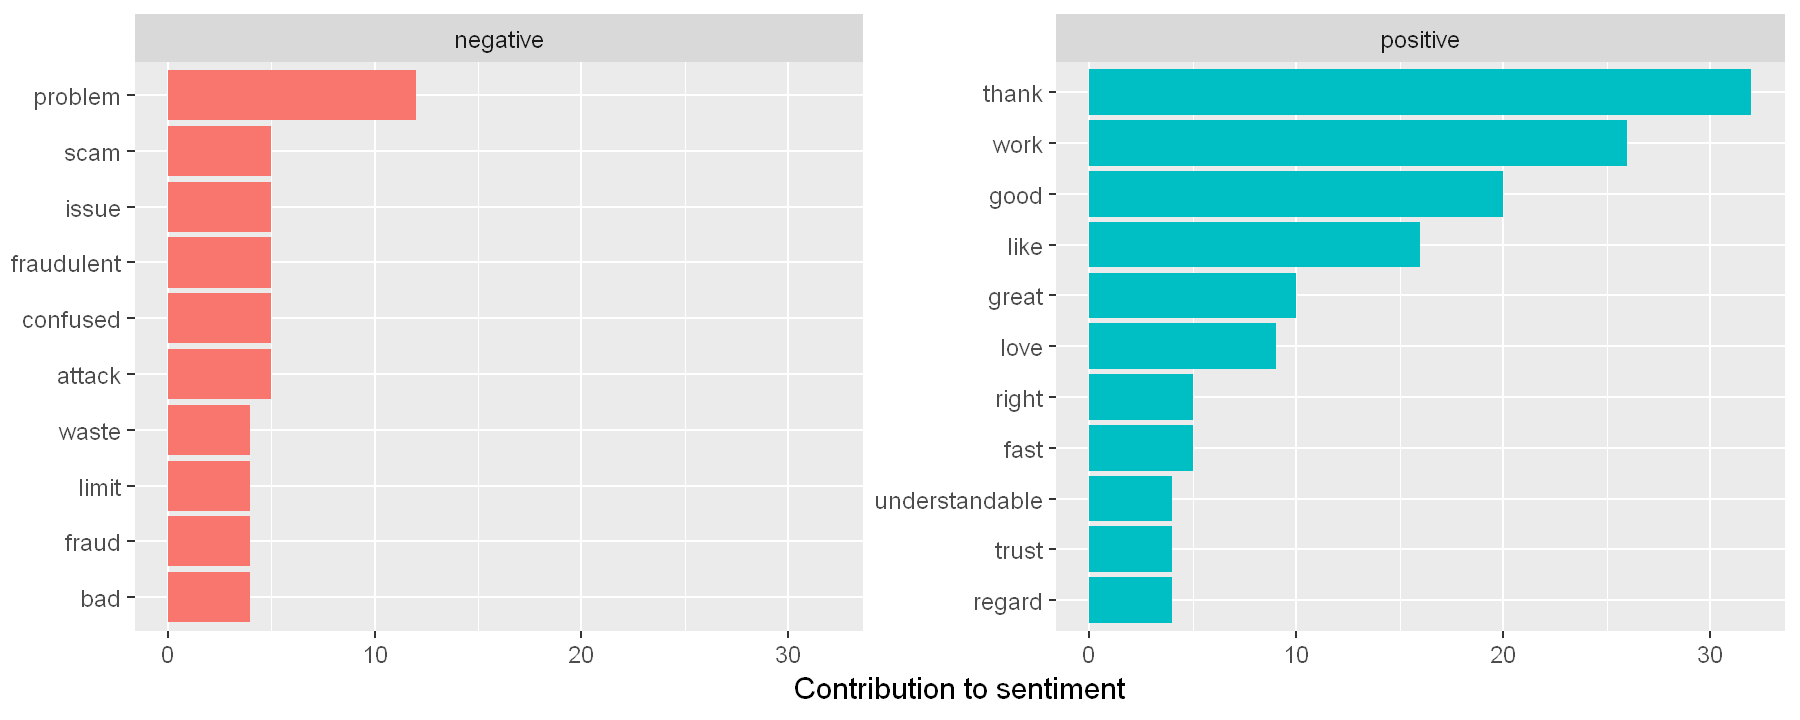

In [14]:
bing_word_counts %>%
  group_by(sentiment) %>%
  slice_max(n, n = 10) %>% 
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(x = "Contribution to sentiment",
       y = NULL) +
  theme_gray(base_size = 18)

In [15]:
library(reshape2)
library(wordcloud)


Attache Paket: 'reshape2'


Das folgende Objekt ist maskiert 'package:tidyr':

    smiths


Lade nötiges Paket: RColorBrewer



Joining, by = "word"


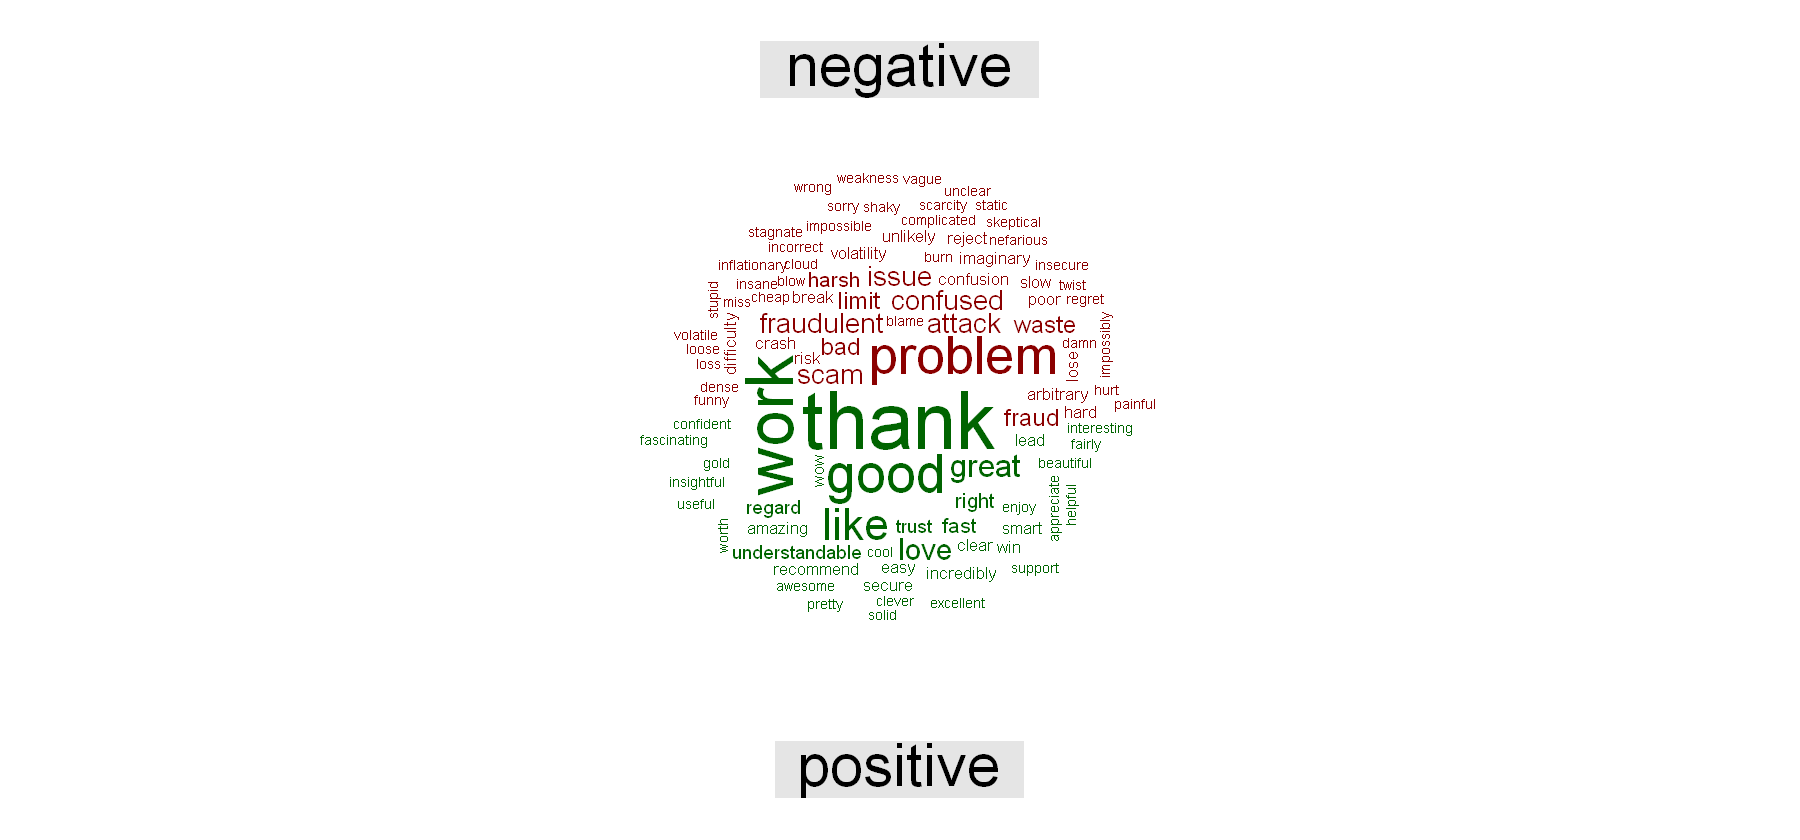

In [16]:
# Word-Cloud consisting of negative and positive words from the comments
options(repr.plot.width = 15, repr.plot.height=7)
tokens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("darkred", "darkgreen"),
                   max.words = 100 )

### Vader Sentiment

In [17]:
#install.packages("vader")

In [18]:
library(vader)

In [19]:
get_vader(text_df[1,2])

word_scores 
"{0, 0, 0, -2.7, 0, 0, 0, 0, 0, 0, 0, 0, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, -1.7, 0.8, 0, 0, 0, 0, 2.2, 0}" 
                                                                                                                                      compound 
                                                                                                                                       "0.103" 
                                                                                                                                           pos 
                                                                                                                                       "0.172" 
                                                                                                                                           neu 
                                                                                                                                       "0.703" 
                                                                                                                                           neg 
                                                                                                                                       "0.125" 
                                                                                                                                     but_count 
                                                                                                                                           "0"

In [20]:
comments <- df$Comment
vader_df(comments)

text,word_scores,compound,pos,neu,neg,but_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
comment investing broker scam video cryptocurrencie evidently include underlie technology math hotbed attract nefarious actor prey hi new channel visualize math I probably land search btc work spend afternoon getting pull learn prime number problem solve moment look rest channel enjoy find,"{0, 0, 0, -2.7, 0, 0, 0, 0, 0, 0, 0, 0, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, -1.7, 0.8, 0, 0, 0, 0, 2.2, 0}",0.103,0.172,0.703,0.125,0
I recommend report reply explain potential reader advertisement scam comment quick save somebody dollar,"{0, 1.5, 0, 0, 0, 0, 0, 0, -2.7, 0, 0, 2.2, 0, 0}",0.250,0.279,0.539,0.181,0
thank lisa,"{1.5, 0}",0.361,0.714,0.286,0.000,0
matter time scammer come discount,"{0.1, 0, 0, 0, 0}",0.026,0.216,0.784,0.000,0
wow I scam scroll reply lmao,"{2.8, 0, -2.7, 0, 0, 2.45}",0.550,0.520,0.215,0.265,0
I appreciate effort account I try I regret,"{0, 1.7, 0, 0, 0, 0, 0, -1.8}",-0.026,0.235,0.522,0.243,0
yeah right,"{-2, 0}",-0.459,0.000,0.250,0.750,0
mr crystal eat hamster,"{0, 0, 0, 0}",0.000,0.000,1.000,0.000,0
gile lmaooooo,"{0, 0}",0.000,0.000,1.000,0.000,0
